**Brian Blaylock**  
*September 26, 2019*

# GOES ABI RGB Recipes

I have gathered several RGB recipies from the [RAMMB CIRA](http://rammb.cira.colostate.edu/training/visit/quick_guides/) website, including:

- TrueColor
- FireTemperature
- AirMass
- DayCloudPhase
- DayConvection
- DayLandCloudFire
- WaterVapor
- DaySnowFog
- etc.

These recipies are provided by the `rgb` custom accessor. This accessor is avaialble when you import goes2go.

For more details on how to generate these plots, see the example on the [Unidata gallery](http://unidata.github.io/python-gallery/examples/mapping_GOES16_TrueColor.html#sphx-glr-examples-mapping-goes16-truecolor-py).

## Simple RGB Figure
At the most simple level, here is how to produce an RGB from the GOES ABI data.

In [9]:
from goes2go import GOES
import matplotlib.pyplot as plt

# Function from Carpenter_Workshop: https://github.com/blaylockbk/Carpenter_Workshop
from toolbox import EasyMap, pc, ccrs

import matplotlib as mpl
mpl.rcParams["font.sans-serif"] = "Hubot-Sans"  # or "Mona-Sans"
mpl.rcParams["font.monospace"] = "Fira Code"

📦 Finished downloading [1] files to [/p/cwfs/blaylock/data/noaa-goes16/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

/p/home/blaylock/miniconda3/envs/goes2go/lib/python3.11/site-packages/matplotlib/cm.py:496: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


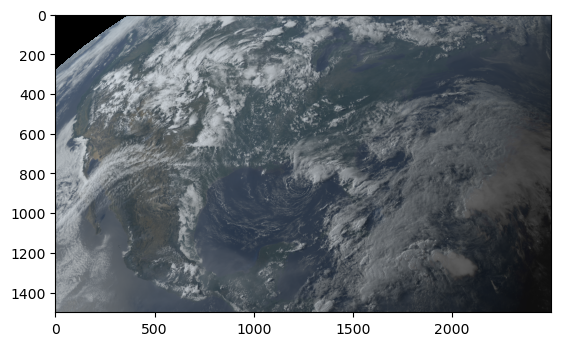

In [2]:
# Get an ABI Dataset
G = GOES().latest()

# Create RGB and plot
plt.imshow(G.rgb.TrueColor())

## Cartopy RGB Figure
The RGB can easily be added to a Cartopy axis

/p/home/blaylock/miniconda3/envs/goes2go/lib/python3.11/site-packages/matplotlib/cm.py:496: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


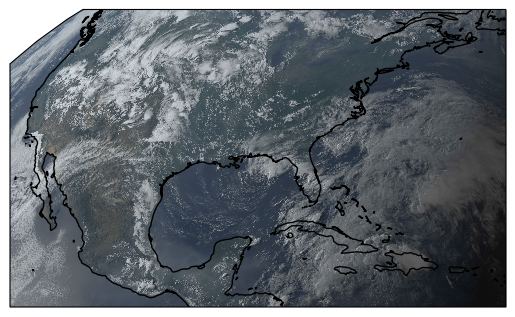

In [3]:
ax = plt.subplot(projection=G.rgb.crs)
ax.imshow(G.rgb.TrueColor(), **G.rgb.imshow_kwargs)
ax.coastlines()

## All available RGB recipes

In [4]:
# G16 = goes_latest()
# G17 = goes_latest(satellite=17)

G16 = GOES(satellite=16).nearesttime("2020-9-22 18")
G17 = GOES(satellite=17).nearesttime("2020-9-22 18")

 👮🏻‍♂️ File already exists. Do not overwrite: /p/cwfs/blaylock/data/noaa-goes16/ABI-L2-MCMIPC/2020/266/18/OR_ABI-L2-MCMIPC-M6_G16_s20202661801132_e20202661803505_c20202661804060.nc
📦 Finished downloading [1] files to [/p/cwfs/blaylock/data/noaa-goes16/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [5]:
rgb_products = [i for i in dir(G16.rgb) if i[0].isupper()]
rgb_products

['AirMass',
 'Ash',
 'DayCloudConvection',
 'DayCloudPhase',
 'DayConvection',
 'DayLandCloud',
 'DayLandCloudFire',
 'DaySnowFog',
 'DifferentialWaterVapor',
 'Dust',
 'FireTemperature',
 'NaturalColor',
 'NightFogDifference',
 'NighttimeMicrophysics',
 'NormalizedBurnRatio',
 'RocketPlume',
 'SeaSpray',
 'SplitWindowDifference',
 'SulfurDioxide',
 'TrueColor',
 'WaterVapor']

In [23]:
rgb_products = [i for i in dir(G16.rgb) if i[0].isupper()]

for product in rgb_products:

    fig = plt.figure(figsize=(10, 6))
    ax17 = fig.add_subplot(1, 2, 1, projection=G17.rgb.crs)
    ax16 = fig.add_subplot(1, 2, 2, projection=G16.rgb.crs)

    for ax, G in zip([ax17, ax16], [G17, G16]):
        RGB = getattr(G.rgb, product)()

        EasyMap("50m",ax=ax).STATES()
        ax.imshow(RGB, **G.rgb.imshow_kwargs)
        ax.set_title(f"{G.orbital_slot} {product}", loc="left", fontweight="bold", fontsize=9)
        ax.set_title(f"{G.t.dt.strftime('%H:%M UTC %d-%b-%Y').item()}  ", loc="right", fontsize=9)
    plt.subplots_adjust(wspace=0.01)
    plt.savefig(f"../../_static/{product}", bbox_inches="tight")

/p/home/blaylock/miniconda3/envs/goes2go/lib/python3.11/site-packages/matplotlib/cm.py:496: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/p/home/blaylock/miniconda3/envs/goes2go/lib/python3.11/site-packages/matplotlib/cm.py:496: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/p/home/blaylock/miniconda3/envs/goes2go/lib/python3.11/site-packages/matplotlib/cm.py:496: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/p/home/blaylock/miniconda3/envs/goes2go/lib/python3.11/site-packages/matplotlib/cm.py:496: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/p/home/blaylock/miniconda3/envs/goes2go/lib/python3.11/site-packages/matplotlib/cm.py:496: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/p/home/blaylock/miniconda3/envs/goes2go/lib/python3.11/site-packages/matplotlib/cm.py:496: RuntimeWarning: invalid